# Oluwafemi Shobowale 
## 2

### KNN Classification and Decison Tree 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

# 1.

In [4]:
#load data 
train= pd.read_table('trainMatrixModified.txt', header= None)
train_label= pd.read_table('trainClasses.txt',header= None , index_col=0)
test= pd.read_table ('testMatrixModified.txt', header= None)
test_label= pd.read_table("testClasses.txt", header=None, index_col=0)
terms= pd.read_table('modifiedterms.txt', header= None)

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Transpose dataset  from (terms,doc) to (doc,terms )

In [6]:
test.shape

(5500, 200)

In [7]:
train_label.shape

(800, 1)

#### Frequency word count.

In [8]:
terms_freq= train.sum(axis=1)
terms_freq.nlargest(20)

3       959.0
225     720.0
136     680.0
1682    578.0
115     545.0
30      483.0
107     470.0
84      429.0
192     401.0
82      378.0
690     370.0
25      329.0
45      326.0
36      325.0
451     323.0
187     319.0
9       318.0
640     311.0
184     302.0
106     300.0
dtype: float64

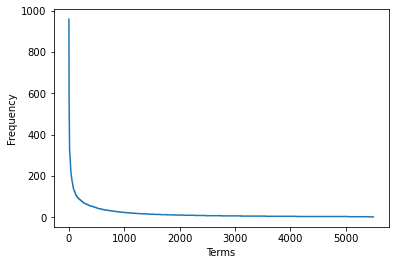

In [9]:
plt.plot(sorted(terms_freq, reverse=True))
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()

### 1A. Create K-Nearest-Neighbor Classifer 

In [10]:
numTerms=train.shape[0]
NDocs = train.shape[1]

In [11]:
print(numTerms)
print(NDocs)

5500
800


### Building Classifier

In [25]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [26]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    return count.most_common(1)[0][0],neigh_idx

### 2B, 

In [20]:
############### convet train and test to DOC/TERM 
train_dt=train.T
test_df= test.T

In [28]:
train_dt.shape

(800, 5500)

In [23]:
## Transfroming data 
train_in= np.array(train_dt)
test_in =np.array(test_df)
train_label_array = np.array(train_label).flatten()
test_label_array = np.array(test_label).flatten()

In [10]:
#CLASSIFYING INSTANCE 1 WITH EUCLIDEAN DISTANCE K=10
a,b=knn_classify(test_in[0],train_in,10,train_label_array,0)
print(a)
train_dt.loc[b]

1


,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#CLASSIFYING INSTANCE 1 WITH EUCLIDEAN DISTANCE K=10
a,b=knn_classify(test_in[0],train_in,10,train_label_array,1)
print(a)
train_dt.loc[b]

1


,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#CLASSIFYING INSTANCE 1 WITH EUCLIDEAN DISTANCE K=10
knn_classify(test_in[1],train_in,10,train_label_array,0)

(0, array([798, 554, 757, 224,  38, 119, 711, 398, 608, 551], dtype=int64))

In [13]:
#CLASSIFYING INSTANCE 1 WITH COSINE DISTANCE K=10
knn_classify(test_in[1],train_in,10,train_label_array,1)

(0, array([382, 775, 163, 587, 550, 127, 485, 651, 767, 458], dtype=int64))

### 2C, EVALUATION 

#### Computing the accuracy of the model, model has a 98% accuracy when  Cosine  distance on test data and 85% accuracy when using  Euclidean distance.

#### Computing the accuracy of the model with training data to help check if model is overfitting or underfitting. Euclidean distance= 95.3% , Cosine distance = 99.3%

#### Hence we see that the data performs well on both training and testing data. 

In [14]:
def knn_evaluation(DT_TEST,TEST_LAB,DT_TRAIN, TRAIN_LAB, K,measure):
    from collections import Counter
    c=[]
    cout=0
    for i in range(len(DT_TEST)):
        clas_lab,b =knn_classify(DT_TEST[i], DT_TRAIN , K, TRAIN_LAB, measure)
        c.append(clas_lab)
        if c[i] == TEST_LAB[i]:
            cout+=1
    return ("ACCURACY:",cout/len(DT_TEST))
    #return (cout/len(DT_TEST))

In [15]:
#computing accuracy of the model.
knn_evaluation(test_in,test_label_array,train_in,train_label_array,10,0)

('ACCURACY:', 0.85)

In [16]:
#computing accuracy of the model.
knn_evaluation(test_in,test_label_array,train_in,train_label_array,10,1)

('ACCURACY:', 0.985)

In [17]:
#computing accuracy of the model. 
knn_evaluation(train_in,train_label_array,train_in,train_label_array,10,0)

('ACCURACY:', 0.9525)

In [18]:
#computing accuracy of the model. 
knn_evaluation(train_in,train_label_array,train_in,train_label_array,10,1)

('ACCURACY:', 0.99375)

### 2D, COMPARING the accuracy with K- VALUES 
#### From the graph we see that  there is a significant decrease in the accuracy as k increase when using Euclidean Distance. And there is no significant decrease in accuracy when using the cosine similarity. 

In [19]:
def knn_evaluation_1(DT_TEST,TEST_LAB,DT_TRAIN, TRAIN_LAB, K,measure):
    from collections import Counter
    c=[]
    cout=0
    for i in range(len(DT_TEST)):
        clas_lab,b = knn_classify(DT_TEST[i], DT_TRAIN , K, TRAIN_LAB, measure)
        c.append(clas_lab)
        if c[i] == TEST_LAB[i]:
            cout+=1
    return (cout/len(DT_TEST))

In [20]:
%%time
k_min=5
k_max=100
Euclid=[]
for k in range (k_min,k_max+k_min,5):
    #computing accuracy of the model.
    Euclid.append(knn_evaluation_1(test_in,test_label_array,train_in,train_label_array,k,0))

Wall time: 2min 41s


In [21]:
%%time
k_min=5
k_max=100
cosine=[]
for k in range (k_min,k_max+k_min,5):
    #computing accuracy of the model.
    cosine.append(knn_evaluation_1(test_in,test_label_array,train_in,train_label_array,k,1))

Wall time: 1min 14s


In [22]:
# list of strings
k=[]
for i in range (5,105,5):
    b=int(i)
    k.append(b)
lst = Euclid  
# list of int
lst2 = cosine
 # Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(k,lst, lst2)),
               columns =['k','Euclid', 'Cosine'])
df.head()

,k,Euclid,Cosine
0,5,0.815,0.970
1,10,0.850,0.985
2,15,0.785,0.985
3,20,0.765,0.975
4,25,0.730,0.970


Text(0, 0.5, 'Accuracy')

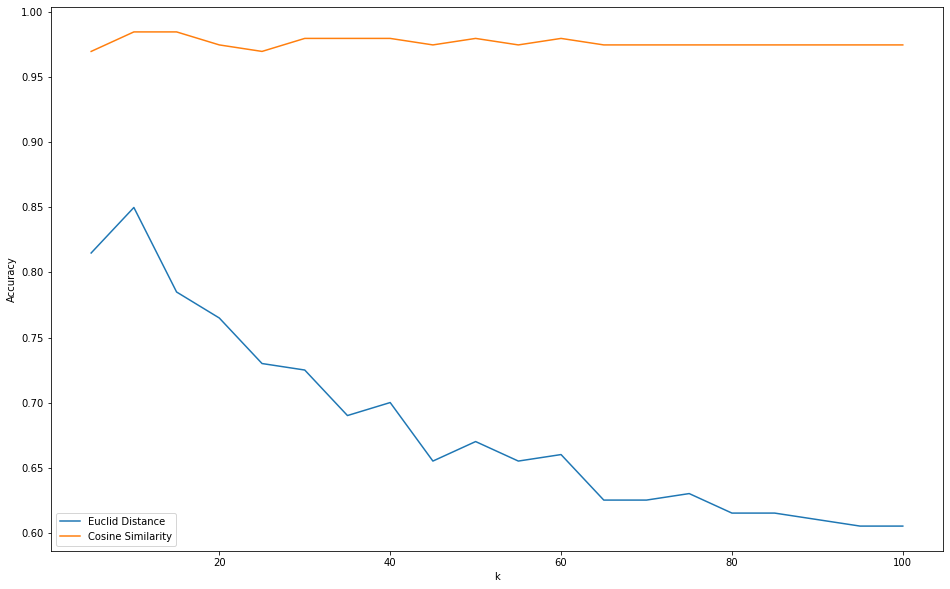

In [23]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=df,x="k",y="Euclid",label='Euclid Distance').set_ylabel("Accuracy")
sns.lineplot(data=df,x="k",y="Cosine",label='Cosine Similarity').set_ylabel("Accuracy")

### 2E, USING TFxIDF AS INPUT

In [6]:
train_copy= train.copy()
test_copy= test.copy()

In [8]:
#creating TXXIDF
DF = pd.DataFrame([(train_copy!=0).sum(1)]).T
DF.head()

(5500, 1)

In [13]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(train_copy), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)
NMatrix.shape

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


(5500, 800)

In [15]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

In [16]:
IDF.shape

(5500, 800)

In [29]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = train_copy * IDF

In [19]:
#TD_tfidf
train_copy

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#making sure IDF MATCH TEST 
IDF_slice = np.array([IDF[i][0:test_copy.shape[1]] for i in range(0,test_copy.shape[0])])
IDF_slice

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]])

In [62]:
IDF_slice.shape

(5500, 200)

In [66]:
# Finally compute the TFxIDF values for each document-term entry
x_tfidf_1 = test_copy * IDF_slice
x_tfidf_1


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.777937,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [485]:

train_tx_1

array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
############### convet train and test to DOC/TERM 
train_tx_1=TD_tfidf.T
test_tx_1= x_tfidf_1.T

In [69]:
## Transfroming data 
train_in_1= np.array(train_tx_1)
test_in_1 =np.array(test_tx_1)
train_label_array = np.array(train_label).flatten()
test_label_array = np.array(test_label).flatten()

In [71]:
#computing accuracy of the model. 
knn_evaluation(train_in_1,train_label_array,train_in_1,train_label_array,10,1)

('ACCURACY:', 0.9925)

In [72]:
%%time
k_min=5
k_max=100
cosine_w=[]
for k in range (k_min,k_max+1,5):
    #computing accuracy of the model.
    cosine_w.append(knn_evaluation_1(test_in_1,test_label_array,train_in_1,train_label_array,k,1))

Wall time: 36.8 s


In [227]:
train_in_1.shape

(800, 5500)

In [73]:
# list of strings
k=[]
for i in range (5,100+1,5):
    b=int(i)
    k.append(b)
lst = cosine_w  
# list of int
lst2 = cosine
 # Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Cosine with TD.IDF', 'Cosine W/O TD.IDF'], index=k)
df

,Cosine with TD.IDF,Cosine W/O TD.IDF
5,0.980,0.970
10,0.990,0.985
15,0.990,0.985
20,1.000,0.975
25,0.995,0.970
30,0.995,0.980
35,0.990,0.980
40,0.995,0.980
45,0.995,0.975
50,0.990,0.980


### Using the TFxIDF increased the accuracy of the model. Though the difference is not that significant in this dataset. 

### 1F ROCCHIO METHOD 

In [76]:
## Transfroming data 
train_in= np.array(train_dt)
test_in =np.array(test_df)
train_label_array = np.array(train_label).flatten()
test_label_array = np.array(test_label).flatten()

In [348]:
###BATCH SAMEPLE FOR TEST 
train_in_batch = np.array([train_in[i][0:100] for i in range(0,30)])
train_label_array_batch = np.array([train_label_array[i] for i in range(0,30)])
train_label_array_batch.shape
train_in_batch.shape

(30, 100)

In [476]:
def rocchio_(training_data, training_label):
    from collections import Counter
    class_from_label= np.unique(training_label)
    number_of_class=sum(pd.value_counts(np.unique(training_label)))
    listOfLists = [[] for i in range(number_of_class)]
    term_=[]
    term_0=[]
    my_dict = {}
    for term in range(len(training_data[0])):
        for doc in range(len(training_data)):
            if training_label[doc] == 0:
                index_0= doc,term
                term_0.append(term)
                listOfLists[0].append(training_data[doc,term])
            if training_label[doc] == 1:
                index_1= doc,term
                listOfLists[1].append(training_data[doc,term])
                term_.append(term)
    from collections import defaultdict

    dict = defaultdict(int)
    for i_dx, count in zip(term_0, listOfLists[0]):
        dict[i_dx] += count
    zero_val = list(dict.values()) 
    
    dict_2 = defaultdict(int)
    for idx, count in zip(term_, listOfLists[1]):
        dict[idx] += count
    one_val = list(dict.values())
        
    return zero_val,one_val


def rouch_test(p_1, p_2, instance):
    """ find K nearest neighbors of an instance x among the instances in D """
  
        # first find the vector norm for each instance in D as wel as the norm for vector x
    D_norm_1 = np.array([np.linalg.norm(p_1)])
    
    D_norm_2 = np.array([np.linalg.norm(p_2)])
    x_norm = np.linalg.norm(instance)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(p_1,instance)/(D_norm_1 * x_norm)
    sims_2 = np.dot(p_2,instance)/(D_norm_2 * x_norm)
        # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    dists_2 = 1 - sims_2
   
    if dists<dists_2:
        return 0
    if dists_2<dists:
        return 1
    # return the indexes of K nearest neighbors
   # return  dists,dists_2
    

def rouch_eval(test,test_label, p_1,p_2):
    c_c=[]
    cout=0
    for i in range(len(test)):
        class_lab= rouch_test(p_1,p_2,test[i])
        c_c.append(class_lab)
        if c_c[i]== test_label[i]:
            cout+=1
    return (cout/len(test))

def knn_evaluation_1(DT_TEST,TEST_LAB,DT_TRAIN, TRAIN_LAB, K,measure):
    from collections import Counter
    c=[]
    cout=0
    for i in range(len(DT_TEST)):
        b = knn_classify(DT_TEST[i], DT_TRAIN , K, TRAIN_LAB, measure)
        c.append(clas_lab)
        if c[i] == TEST_LAB[i]:
            cout+=1
    return (cout/len(DT_TEST))

In [471]:
zeroval,oneval=rocchio_(train_in,train_label_array)
rouch_eval(test_in,test_label_array,zeroval,oneval)

In [477]:
rouch_eval(test_in,test_label_array,zeroval,oneval)

0.91

### Accuracy is 91% compared to which is higher than KNN with EUCLIDIAN distance , but KNN with cosine distance has an higher accuracy 

### 1E, USING SCIKIT-LEARN NEAREST CENTRIOD

In [46]:
## Transfroming data 
train_in= np.array(train_dt)
test_in =np.array(test_df)
train_label_array = np.array(train_label).flatten()
test_label_array = np.array(test_label).flatten()

In [47]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(train_in, train_label_array)

NearestCentroid()

In [48]:
c=clf.predict(test_in)

In [49]:
clf.score(test_in, test_label_array, sample_weight=None)

0.94

# 2

In [50]:
adult_1 = pd.read_csv('adult-modified.csv',na_values=['?'])
adult_1.shape

(9412, 8)

In [51]:
adult_1.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [52]:
adult_copy= adult_1.copy()
adult_copy= pd.get_dummies(adult_copy)
adult_copy.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [53]:
target= adult_copy["income_>50K"]

In [54]:
adult_copy.drop(columns={'income_>50K',"income_<=50K"}, axis=1, inplace=True)

In [55]:
adult_copy.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [56]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult_copy, target, test_size=0.20,  random_state=111)

In [57]:
#######Normalize data. 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [58]:
#####KNN MODEL 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
knn_predict= neigh.predict(X_test)
print("Accuracy on Testing",neigh.score(X_test,y_test))
print("Accuracy on Training:",neigh.score(X_train,y_train))

Accuracy on Testing 0.8019118428040362
Accuracy on Training: 0.8435383185017931


In [59]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knn_matrix=confusion_matrix(y_test,knn_predict)

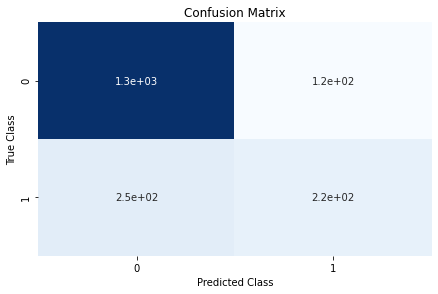

In [60]:
# Create pandas dataframe
dataframe = pd.DataFrame(knn_matrix)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [61]:
from sklearn.metrics import classification_report
# Create a classification report
print("REPORT ON TESTING\n",classification_report(y_test,knn_predict))

REPORT ON TESTING
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1417
           1       0.64      0.46      0.54       466

    accuracy                           0.80      1883
   macro avg       0.74      0.69      0.71      1883
weighted avg       0.79      0.80      0.79      1883



In [62]:
knn_predict_on_train= neigh.predict(X_train)
from sklearn.metrics import classification_report
# Create a classification report
print("REPORT ON TRAINING\n",classification_report(y_train,knn_predict_on_train))

REPORT ON TRAINING
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5676
           1       0.75      0.54      0.63      1853

    accuracy                           0.84      7529
   macro avg       0.81      0.74      0.77      7529
weighted avg       0.84      0.84      0.83      7529



#### The overall accuracy of the model on testing data is 81% and the overall accuracy on training data is 84%. Hence model is able to generalize well. 

## ii. Using a range of k (5 to 100) and weight parameter to improve accuracy.

#### Accuracy without weight out performs the accuray with weight. But the maximum accuracy seem to be without weight. From the model result we see that K=30 has the highest accuracy. With the initial K=10 there seem to be no significant increase in accuracy. 

In [63]:
##############

from sklearn.neighbors import KNeighborsClassifier
score_wo_weight= []
for k in range(5,105, 5):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    knn_predict= neigh.predict(X_test)
    score_without_weight=score_wo_weight.append((neigh.score(X_test, y_test)))
    #score_without_weight=score_wo_weight.append((neigh.score(X_test, y_test, sample_weight=None)))
    #score_with_weight=score_w_weight.append((neigh.score(X_test, y_test, sample_weight="distance")))

In [64]:
##############
from sklearn.neighbors import KNeighborsClassifier
score_w_weight= []
for k in range(5,105, 5):
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance')
    neigh.fit(X_train, y_train)
    knn_predict= neigh.predict(X_test)
    score_with_weight=score_w_weight.append((neigh.score(X_test, y_test)))

In [65]:
# list of strings
k=[]
for i in range (5,105,5):
    b=int(i)
    k.append(b)
lst = score_wo_weight  
# list of int
lst2 = score_w_weight
 # Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(k,lst, lst2)),
               columns =['k','without_weight', 'with_weight'])
df.head()

,k,without_weight,with_weight
0,5,0.79,0.78
1,10,0.80,0.79
2,15,0.80,0.79
3,20,0.81,0.80
4,25,0.81,0.80


In [66]:
max_with=df['with_weight'].max()
df.loc[df['with_weight'] == max_with]

,k,without_weight,with_weight
18,95,0.81,0.81
19,100,0.81,0.81


In [67]:
max_witho=df['without_weight'].max()
df.loc[df['without_weight'] == max_witho]

,k,without_weight,with_weight
5,30,0.81,0.8


Text(0, 0.5, 'Accuracy')

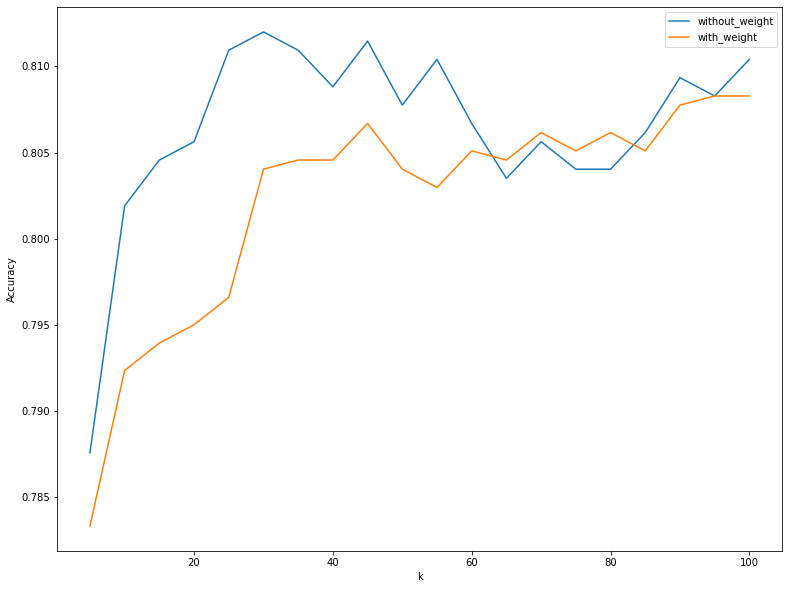

In [68]:
plt.figure(figsize=(13, 10))
sns.lineplot(data=df,x="k",y="without_weight",label='without_weight').set_ylabel("Accuracy")
sns.lineplot(data=df,x="k",y="with_weight",label='with_weight').set_ylabel("Accuracy")

#### Accuracy without weight out performs the accuray with weight. But the maximum accuracy seem to be without weight. From the model result we see that K=30 has the highest accuracy. With the initial K=10 there seem to be no significant increase in accuracy. 

In [69]:
#####KNN MODEL with the result K=30 AND NO DISTANCE 
from sklearn.neighbors import KNeighborsClassifier
neigh_1 = KNeighborsClassifier(n_neighbors=30)
neigh_1.fit(X_train, y_train)
knn_predict= neigh_1.predict(X_test)
print(neigh_1.score(X_test,y_test))

0.8120021242697822


### iii. Using a range of k (5 to 100) and  uniform weight. from the graph we see that the models over fits from k=5 to k=25.  The model performs well on the training data and worse on the testing data. Hence smaller k values may cause the model to not generalize well. 

In [70]:
##############
from sklearn.neighbors import KNeighborsClassifier
score_w_uni_weight= []
score_w_uni_weight_train= []
for k in range(5,105, 5):
    neigh = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    neigh.fit(X_train, y_train)
    knn_predict= neigh.predict(X_test)
    knn_predict_train= neigh.predict(X_train)
    score_with_uni_weight=score_w_uni_weight.append((neigh.score(X_test, y_test)))
    score_with_uni_weight=score_w_uni_weight_train.append((neigh.score(X_train, y_train)))
    

In [71]:
# list of strings
k=[]
for i in range (5,105,5):
    b=int(i)
    k.append(b)
lst = score_w_uni_weight  
# list of int
lst2 = score_w_uni_weight_train
 # Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(k,lst, lst2)),
               columns =['k','with_u_test', 'with_u_train'])

df["over_under"]= df["with_u_train"]-df["with_u_test"]

df.head()

,k,with_u_test,with_u_train,over_under
0,5,0.79,0.85,0.07
1,10,0.80,0.84,0.04
2,15,0.80,0.84,0.03
3,20,0.81,0.83,0.02
4,25,0.81,0.83,0.01


Text(0, 0.5, 'Accuracy')

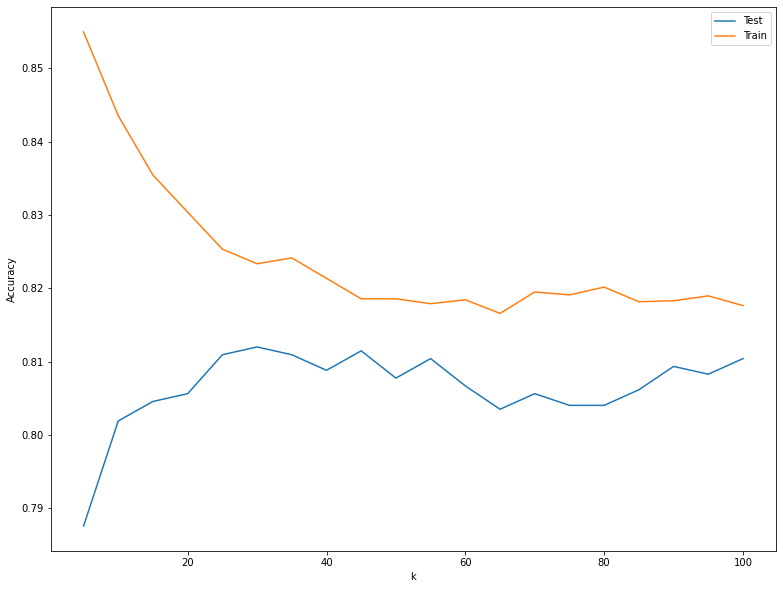

In [72]:
plt.figure(figsize=(13, 10))
sns.lineplot(data=df,x="k",y="with_u_test",label='Test').set_ylabel("Accuracy")
sns.lineplot(data=df,x="k",y="with_u_train",label='Train').set_ylabel("Accuracy")

Text(0, 0.5, 'Error')

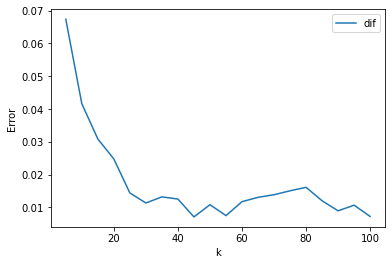

In [73]:
########Model performance as k increace
sns.lineplot(data=df,x="k",y="over_under",label='dif').set_ylabel("Error")

## 2C, Decision tree classifier. 

In [74]:
from sklearn import neighbors, tree, naive_bayes
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [75]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult_copy, target, test_size=0.20,  random_state=111)

In [76]:
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)
print("Score on Testing: ",treeclf.score(X_test, y_test))
print("Score on Training",treeclf.score(X_train, y_train))

Score on Testing:  0.7742963356346256
Score on Training 0.8957364855890556


### The accuracy suggest some slight model over fitting. In term of bias-variance trade off we can say the model is sensitive (high variance) because it performs poorly on new data

In [77]:
from sklearn.metrics import classification_report
# Create a classification report
print("REPORT ON TESTING\n",classification_report(y_test,treepreds_test))

REPORT ON TESTING
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1417
           1       0.55      0.48      0.51       466

    accuracy                           0.77      1883
   macro avg       0.69      0.68      0.68      1883
weighted avg       0.77      0.77      0.77      1883



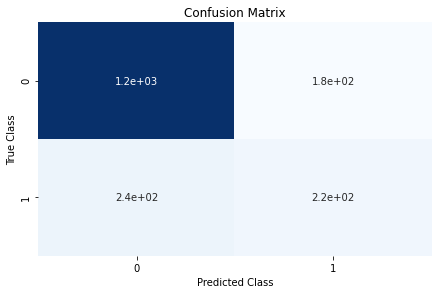

In [78]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tree_matrix=confusion_matrix(y_test,treepreds_test)

# Create pandas dataframe
dataframe = pd.DataFrame(tree_matrix)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [79]:
from sklearn import neighbors, tree, naive_bayes
treeclf_2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10,max_depth=4)
treeclf_fit= treeclf_2.fit(X_train, y_train)
treepreds_test = treeclf_2.predict(X_test)
print("Score on Testing: ",treeclf_2.score(X_test, y_test))
print("Score on Training",treeclf_2.score(X_train, y_train))

Score on Testing:  0.8130642591609134
Score on Training 0.817638464603533


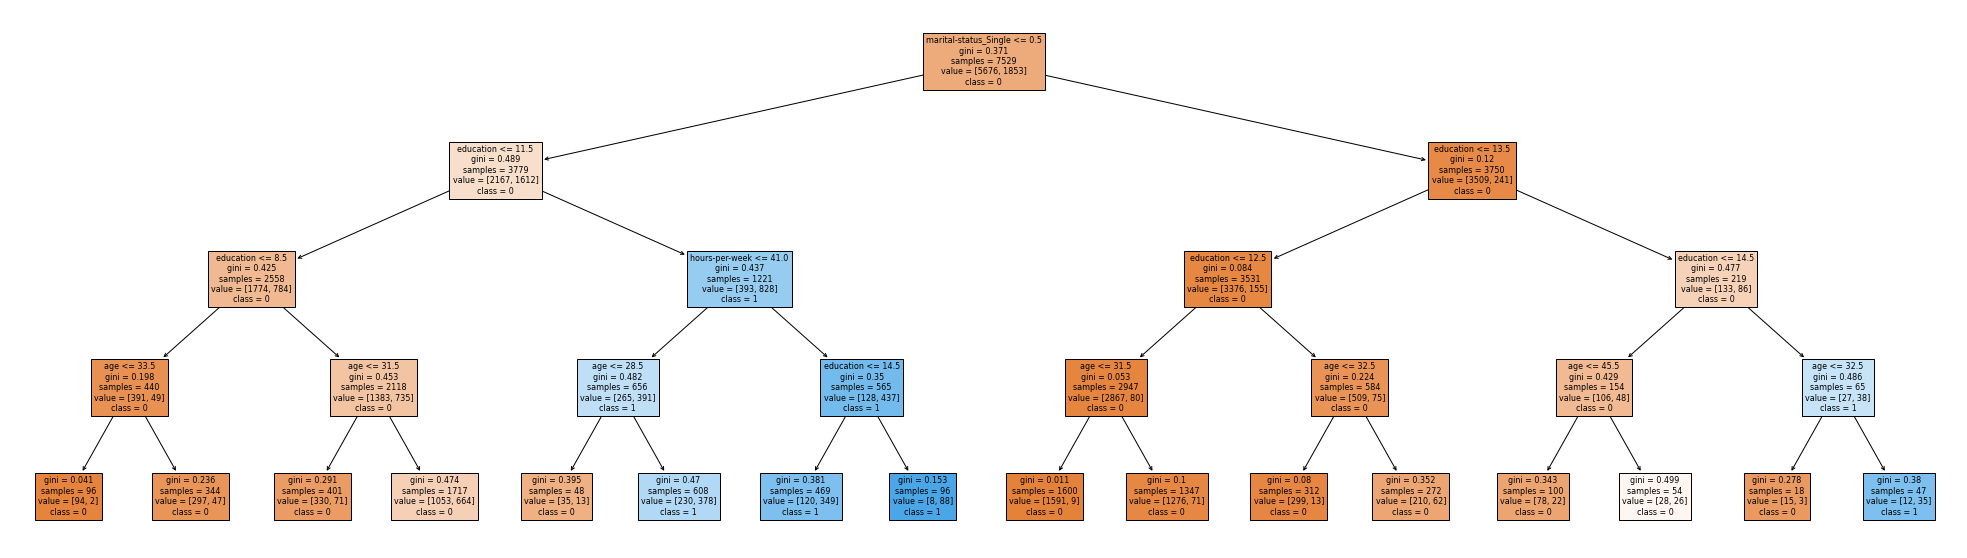

In [99]:
fig = plt.figure(figsize=(35,10))
_ = tree.plot_tree(treeclf_2, 
                   feature_names=adult_copy.columns,  
                   class_names=["0","1"],
                   filled=True)

## 2d,  Naive Bayes (Gaussian) and linear discriminant analysis (LDA)

In [86]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult_copy, target, test_size=0.20,  random_state=111)

In [87]:
nbclf = naive_bayes.GaussianNB()

In [88]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(nbclf, X_train, y_train, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


[0.72 0.71 0.73 0.69 0.74 0.74 0.71 0.71 0.71 0.74]
Overall Accuracy: 0.72 (+/- 0.03)


In [89]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X_train, y_train)
print("Score on Training: ", nbclf.score(X_train, y_train))
print("Score on Test: ", nbclf.score(X_test, y_test))

Score on Training:  0.7218754150617612
Score on Test:  0.7110993096123208


### With CV  the accuracy there seem to be no significant differenece in the accuracy of them model model is . 

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

ldclf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(ldclf, X_train, y_train, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.82 0.8  0.83 0.79 0.81 0.82 0.81 0.79 0.82 0.82]
Overall Accuracy: 0.81 (+/- 0.02)


In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(X_train, y_train)
print("Score on Training: ", ldclf.score(X_train, y_train))
print("Score on Test: ", ldclf.score(X_test, y_test))

Score on Training:  0.8115287554788152
Score on Test:  0.7992565055762082


### There seem to be no significant difference between the model accuracy accurcy with or without cross-validation. 

In [92]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(nbclf, X_test, y_test, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


[0.56 0.56 0.52 0.54 0.6  0.52 0.55 0.56 0.64 0.53]
Overall Accuracy: 0.56 (+/- 0.07)


In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

ldclf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(ldclf, X_test, y_test, cv=10)
print(cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.83 0.78 0.77 0.81 0.79 0.8  0.85 0.77 0.79 0.78]
Overall Accuracy: 0.80 (+/- 0.05)


### Training the naive bayes model with 20% training data drops the accuracy of the model. For the LDA , it seems to be the same regarless of the amout of sample or size of dataset. 